Keras is a deep learning API written in Python that runs on top of TensorFlow

MNIST is a large database of handwritten digits commonly used in training and testing image processing systems. The image dimensions are 28x28 numpy arrays


NOTE: This Notebook is only compatible wuth Tensorflow 1.0

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


mnist = keras.datasets.mnist
(train_images, train_labels) , (test_images,
                                test_labels) = mnist.load_data()

print("Training data: {}, {}".format(train_images.shape, train_labels.shape))

#For the test data
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))

#Number of Unique classes in the Data
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))




11493376/11490434 [==============================] - 8s 1us/step
Training data: (60000, 28, 28), (60000,)
Test data: (10000, 28, 28), (10000,)
There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


Peeking at the data (Visualize the Images)

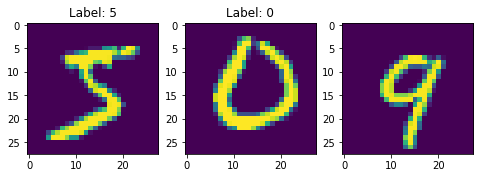

In [5]:
#Plotting some of the datapoints

plt.figure(figsize=(8, 5))
plt.subplot(1,3,1)
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))
plt.subplot(1,3,2)
plt.imshow(train_images[2500])
plt.title("Label: {}".format(train_labels[2500]))
plt.subplot(1,3,3)
plt.imshow(test_images[12])
plt.show()

In [6]:
#Scale the Data
# As usual, we scale our dataset to range between 0 and 1. In this dataset, the pixel values
# Dividing the data by 255 scales to the required range
train_images = train_images / 255.0
test_images = test_images / 255.0

Split training data to training and validation sets

In [7]:
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]
print("x_train: {}".format(x_train.shape)) # prints x_train: (50000, 28, 28)
print("x_val: {}".format(x_val.shape)) # prints x_val: (10000, 28, 28)
print("y_train: {}".format(y_train.shape)) #prints y_train: (50000,)
print("y_val: {}".format(y_val.shape)) #prints y_val: (10000,

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


Reshape data from 28 * 28 array to a single array

In [8]:
new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)
print("x_train: {}".format(x_train.shape)) #prints x_train: (50000, 784)
print("x_val: {}".format(x_val.shape)) #prints x_val: (10000, 784)
print("test_images: {}".format(test_images.shape)) #prints test_images: (10000, 784)

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


Encode labels to categorical variables

In [9]:
from keras.utils import to_categorical #tensorflow.keras.utils
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

Activation functions and Neural Networks hyperparameters

In [14]:
#placeholders are not enabled in tf2.0
#X = tf.placeholder(tf.float32, [None, new_dimension])
#Y = tf.placeholder(tf.float32, [None, no_labels])

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

X = tf.compat.v1.placeholder(tf.float32, [None, new_dimension])
Y = tf.compat.v1.placeholder(tf.float32, [None, no_labels])

Instructions for updating:
non-resource variables are not supported in the long term


In [15]:
# create model architecture
def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
    # first layer
    first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
    first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
    first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))
    # second layer
    second_weight = tf.Variable(tf.random_uniform([first_layer_neurons,second_layer_neurons]))
    second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
    second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight),
    second_bias))
    # output layer
    final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
    final_bias = tf.Variable(tf.zeros([no_classes]))
    logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)
    return logits


Call the multilayer perception function

In [16]:
logits = multilayer_perceptron(X, no_labels)
learning_rate = 0.01
#we define the loss and optimiser for the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [17]:
#initialise the variables
init = tf.global_variables_initializer()
epochs = 20
batch_size = 1000
iteration = len(x_train) // batch_size

In [20]:
#train model
with tf.Session() as session:
    session.run(init)
    for epoch in range(epochs):
        average_cost = 0
        start, end = 0, batch_size
    for i in range(iteration):
        batch_x, batch_y = x_train[start: end], y_train[start: end]
        _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
        start += batch_size
        end += batch_size
        #average loss
        average_cost += loss/iteration
    print("Epoch========{}".format(epoch))

Epoch========19


Evaluate the Model

In [24]:
prediction = tf.nn.softmax(logits)
ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))

ValueError: Cannot evaluate tensor using `eval()`: No default session is registered. Use `with sess.as_default()` or pass an explicit session to `eval(session=sess)`